In [1]:
#!pip install pydot graphviz
# !brew install graphviz
!pip install tensorflow-gpu --upgrade
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Requirement already up-to-date: tensorflow-gpu in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [0]:
#model = keras.applications.ResNet50V2()

In [0]:
from tensorflow.keras.utils import plot_model

In [0]:
# plot_model(model)

In [0]:
# loading data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
x_train[0].shape

(32, 32, 3)

In [0]:
# building custom layer

inputs = keras.Input(shape=(32,32,3),name="img")
x = keras.layers.Conv2D(64,3,activation="relu",kernel_initializer='he_uniform', padding='same')(inputs)
x = keras.layers.Conv2D(64,3,activation="relu",kernel_initializer='he_uniform', padding='same')(x)
x = keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = keras.layers.Dropout(.25)(x)

x = keras.layers.Conv2D(128,3,activation="relu",kernel_initializer='he_uniform', padding='same')(x)
x = keras.layers.Conv2D(128,3,activation="relu",kernel_initializer='he_uniform', padding='same')(x)
x = keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = keras.layers.Dropout(.25)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512,activation="relu")(x)
x = keras.layers.Dropout(.5)(x)
x = keras.layers.Dense(64,activation="relu")(x)
outputs = keras.layers.Dense(10,activation='softmax')(x)

model_cifar_custom = keras.Model(inputs=inputs,outputs=outputs,name="resnet-cifar-model")

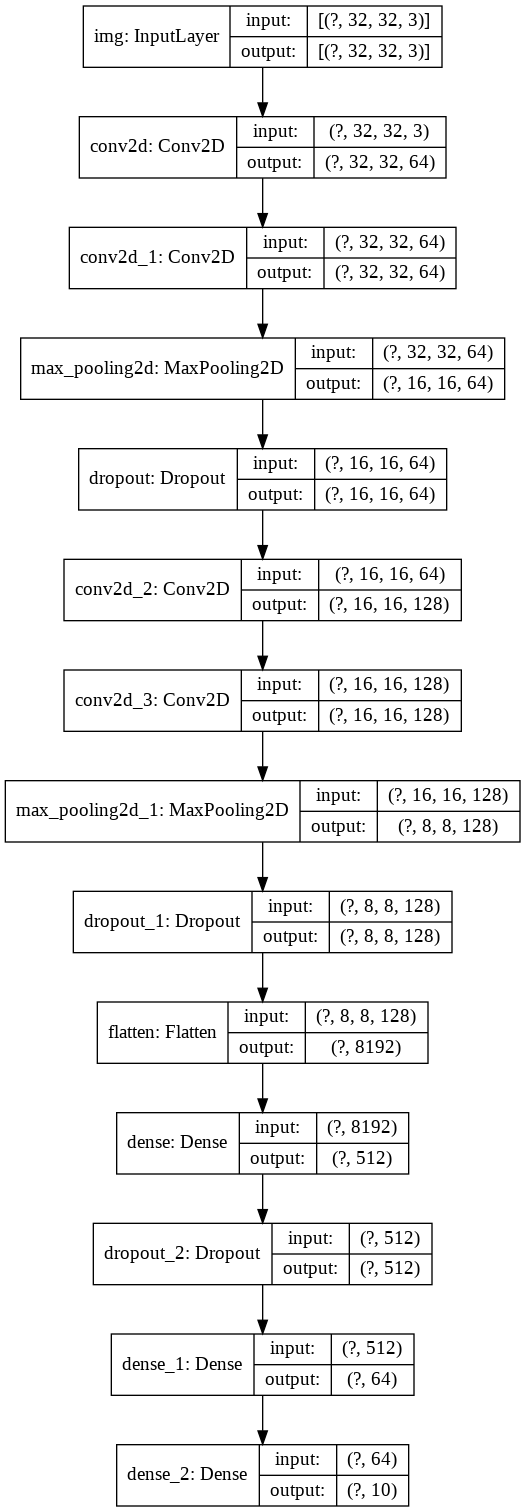

In [9]:
plot_model(model_cifar_custom,show_shapes=True)

In [10]:
model_cifar_custom.summary()

Model: "resnet-cifar-model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)

In [0]:
import datetime

class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_train_epoch_begin(self, epoch, logs=None):
        print('Training: batch {} begins at {}'.format(epoch, datetime.datetime.now().time()))

#   def on_train_batch_begin(self, batch, logs=None):
#     print('Training: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

#   def on_train_batch_end(self, batch, logs=[None]):
#     print('Training: batch {} ends at {} and accuracy is {} and {} '.format(batch, datetime.datetime.now().time(),logs['accuracy'],logs))

#   def on_test_batch_begin(self, batch, logs=None):
#     print('Evaluating: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

#   def on_test_batch_end(self, batch, logs=None):
#     print('Evaluating: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

In [0]:
model_cifar_custom.compile(optimizer=Adam(learning_rate=0.0001,decay=1e-6),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [13]:
model_cifar_custom.fit(x=x_train/255.0,y=y_train,epochs=50,batch_size=256,validation_split=.1,verbose=0,callbacks=[MyCustomCallback()])

In [14]:
model_cifar_custom.evaluate(x=x_test/255.0,y = y_test)

10000/10000 [==============================] - 1s 133us/sample - loss: 0.7486 - accuracy: 0.7936


[0.748598234128952, 0.7936]